<a href="https://colab.research.google.com/github/Magaton1010/Python_Analysis/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multiple Linear Regression**

Use scikit-learn to implement Multiple Linear Regression
Create a model, train it, test it and use the model
************************************************************
1.exploring the Data
2.Reading the Data in
3.Multiple Regression Model
4.Prediction


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import requests
%matplotlib inline

In [5]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
response=requests.get(path)
with open ("FuelConsumptionCo2.csv","wb") as file :
  file.write(response.content)


**FuelConsumption.csv**
We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada

MODELYEAR e.g. 2014

---
---
.MAKE e.g. Acura

.MODEL e.g. ILX

.VEHICLE CLASS e.g. SUV

.ENGINE SIZE e.g. 4.7

.CYLINDERS e.g 6

.TRANSMISSION e.g. A6

.FUELTYPE e.g. z

.FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9

.FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9

.FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2

.CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0


In [8]:
df = pd.read_csv(path)
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


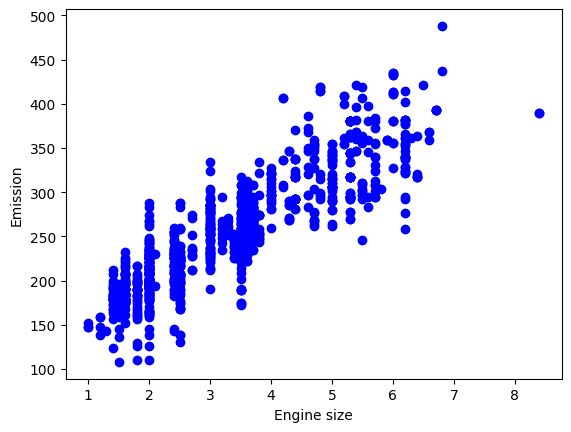

In [14]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color="blue")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

**Creating train and test dataset**

In [16]:
mask=np.random.rand(len(df))<0.8
train=df[mask]
test=df[~mask]

**Train data distribution**

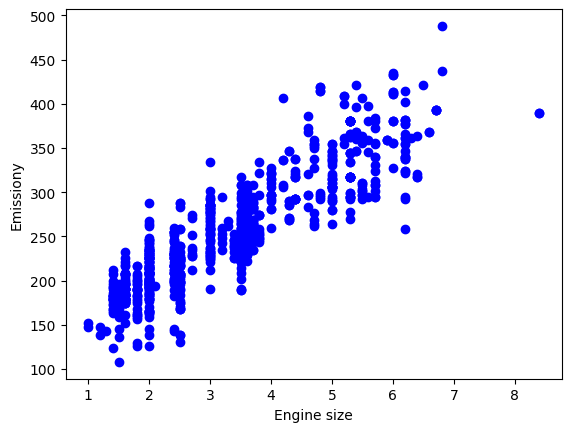

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emissiony")
plt.show()

In [31]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(x,y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print(regr.coef_[0][0])
print(regr.coef_[0][1])
print(regr.coef_[0][2])


Coefficients:  [[12.27905382  7.14833982  9.38864006]]
12.279053824031692
7.148339820275989
9.38864005605895
Intercept:  [65.27983518]


**Prediction**

In [40]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))


Residual sum of squares: 632.05
Variance score: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Try to use a multiple linear regression with the same dataset, but this time use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB

In [41]:
# write your code here
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[12.30786975  7.01681705  5.49015447  3.79403612]]
Residual sum of squares: 631.12
Variance score: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
